# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [59]:
#import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [5]:
spaceship[spaceship.isna().any(axis = 1)].head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
def clean_null_values(df):
    columns = [column for column in df.columns]
    for col in columns:
        if df[col].dtype =="float64":
            df.loc[
                df[col].isna(),
                col
                ] = df[col].mean()
        else:
            df.loc[
                df[col].isna(),
                col
                ] = df[col].mode().iloc[0]
    return df


spaceship = clean_null_values(spaceship)

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [7]:
cols = [col for col in spaceship.columns if spaceship[col].dtype=="float64"]
x = spaceship[cols]

And also lets define our target.

In [8]:
y = spaceship.iloc[:,-1]

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [141]:
def cutting_rows (df):
    df_cols = [col for col in df.columns]
    df_copy = df.copy()
    for i in df_cols:
        print(i)
        bins = [i for i in range(int(min(df_copy[i])-1),int(max(df_copy[i]+1)),1000)]
        labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
        df_copy[f'{i} cut'] = pd.cut(df_copy[i], bins = bins, labels = labels)
    return df_copy

x_copy = cutting_rows(x)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_7220/4120904330.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  food_court = pd.pivot_table(data = x_copy, aggfunc="count", values= "FoodCourt", index = "FoodCourt cut")


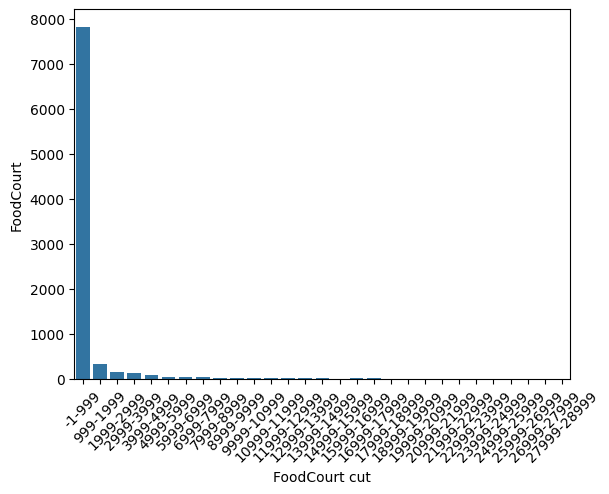

In [142]:
food_court = pd.pivot_table(data = x_copy, aggfunc="count", values= "FoodCourt", index = "FoodCourt cut")
sns.barplot(data=food_court, x="FoodCourt cut", y="FoodCourt")
plt.xticks(rotation=45)
plt.show()

/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_7220/3479278598.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ShoppingMall = pd.pivot_table(data = x_copy, values = "ShoppingMall",index = "ShoppingMall cut", aggfunc="count")


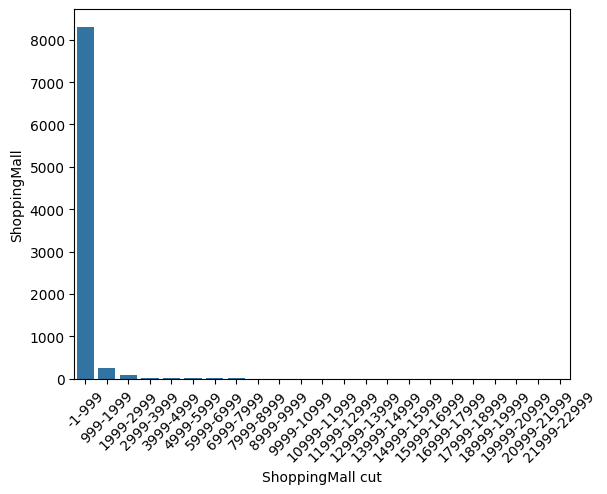

In [34]:
ShoppingMall = pd.pivot_table(data = x_copy, values = "ShoppingMall",index = "ShoppingMall cut", aggfunc="count")
sns.barplot(data = ShoppingMall,x = "ShoppingMall cut",y= "ShoppingMall")
plt.xticks(rotation = 45)
plt.show()

In [143]:
X_train, X_test, y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.2)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [144]:
sqrt_n_y_test = int(math.sqrt(len(y_test)))
knn = KNeighborsClassifier(n_neighbors=sqrt_n_y_test)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=41)

Fit the model to your data.

In [145]:
pred = knn.predict(X_test)


Evaluate your model.

In [146]:
cm = confusion_matrix(y_test,pred)
cm

array([[573, 290],
       [116, 760]])

In [147]:
data = {
    "y_pred" : pred,
    "y_test": y_test

}
df = pd.DataFrame(data)
df["result"] = (df["y_pred"]==df["y_test"]).astype(int)
confussionmatrix = pd.pivot_table(data=df, index = "y_pred", columns="result", aggfunc="count")
confussionmatrix

y_test     
result      0    1
y_pred            
False     116  573
True      290  760

In [135]:
accuracy = float(confussionmatrix["y_test"][1].sum()/len(y_test))
missclassification_rate = float((confussionmatrix["y_test"][0][1] +confussionmatrix["y_test"][1][0])/len(y_test))
true_positive_recall = float(confussionmatrix["y_test"][1][1]/(confussionmatrix["y_test"][1][1]+ confussionmatrix["y_test"][0][0]))
precission = float(confussionmatrix["y_test"][1][1]/(confussionmatrix["y_test"][1][1] + confussionmatrix["y_test"][0][1]))

/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_7220/1144102969.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  missclassification_rate = float((confussionmatrix["y_test"][0][1] +confussionmatrix["y_test"][1][0])/len(y_test))
/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_7220/1144102969.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_positive_recall = float(confussionmatrix["y_test"][1][1]/(confussionmatrix["y_test"][1][1]+ confussionmatrix["y_test"][0][0]))
/var/folders/6g/dhv5ylld76zgp_63c85rplcc0000gn/T/ipykernel_7220/1144102969.py:4: FutureWarning: Series.__getitem__ treating 

In [138]:
metrics = {
    "Metric": ["Accuracy", "Missclassification Rate", "True Positive Recall", "Precision"],
    "Value": [accuracy, missclassification_rate, true_positive_recall, precission]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

metrics_df

,Metric,Value
0,Accuracy,0.766532
1,Missclassification Rate,0.496262
2,True Positive Recall,0.867580
3,Precision,0.723810


**Congratulations, you have just developed your first Machine Learning model!**